# Distribución de Probabilidad Binomial
1. Una distribución de probabilidad es una distribución que indica la probabilidad de cada valor de la variable aleatoria. 
2. A menudo se expresa como gráfica, tabla o fórmula.
3. Una distribución de probabilidad es como una distribución de frecuencias, 
    + en dónde la frecuencia o valor correspondiente a cada valor de x es un valor de probabilidad.
###### Ver Distribución discreta de probabilidad binomial en: https://www.chreinvent.com/recursos/distribuci%C3%B3n-binomial    

In [1]:
import math
from statistics import mean, median, mode, variance, stdev
from itertools import accumulate
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import binom

## Selección  de miembros  del jurado.
###### Ver descripción del caso y documentación del problema en: https://www.chreinvent.com/post/discriminaci%C3%B3n-en-la-selecci%C3%B3n-del-jurado
1. Se elijen al azar a 12 integrantes del jurado de una población en la que:
    + El **80%** de los habitanes es de origen méxico-estadounidesnse.
2. Consideramos que **x es el número de méxico-estadounidenses** en un total de 12 miembros del jurado.
    + a. Entonces x es una variable aleatoria porque su valor depende del azar. 
    + b. Los valores posibles de x son 0, 1, 2, . . . , 12. 
3. Al construir la **tabla de datos** se incluyen los valores de x, junto con las probabilidades correspondientes. 
    + La tabla incluye la probabilidad exacta con decimales para cada valor de la variable aleatoria x, 
        + Esto implica que esa tabla describe una distribución de probabilidad.
        + Los valores de probabilidad que son muy pequeños, como 0.000000123, se muestran como 0.
4. Las **figuras** son histogramas de probabilidad parecidas a histogramas de frecuencias relativas, 
    + pero la escala vertical indica **probabilidades** en vez de **frecuencias relativas basadas en resultados muestrales reales**.
5. Los cálculos de la distribución se hacen por **distribución binomial**.
    + Se puede aproximar por binomial (sucesos independientes) aunque los sucesos sean dependientes porque la muestra (2) es de un tamaño muy pequeño con relación a la población (cientos de miles de habitantes).

### Parametros

In [ ]:
# Definición de parámetros del problema
n = 12    # Número de integrantes del jurado
p = 0.8   # Probabilidad de ser seleccionado
x = [ x for x in range(n+1)] # x varia de 0 a 12

### Construcción de la distribución binomial

In [3]:
# Calculo de la distribución de probabilidad binomial
# Lista con las probabilidades simples para cada x
d_prob = [binom.pmf(x, n, p) for x in range(n + 1)]

# Lista con las probabilidades acumuladas para cada x
d_prob_ac = list(accumulate(d_prob))

# Lista con las probabilidades acumuladas en orden inverso
d_prob_ac_inv = list(accumulate(d_prob[::-1]))[::-1]

# Imprimir cada número con dos decimales usando f-string # for num in dist_prob_ac: print(f"{num:.2f}")

### Tabla y Gráficos
+ Probabilidades: La suma de la probabilidad debe dar 1
+ Media: La suma-producto de x por su probabilidad debe dar la media
+ Varianza: La suma-producto de x al cuadrado por la probabilidad menos la media debe dar la varianza
+ Desviación Estandard: La raiz cuadrada de la varianza debe dar la desviación estandard

        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.001  0.000  1.000
4   0.001  0.002   0.008  0.001  1.000
5   0.003  0.017   0.083  0.004  0.999
6   0.016  0.093   0.558  0.019  0.996
7   0.053  0.372   2.604  0.073  0.981
8   0.133  1.063   8.504  0.205  0.927
9   0.236  2.126  19.134  0.442  0.795
10  0.283  2.835  28.347  0.725  0.558
11  0.206  2.268  24.945  0.931  0.275
12  0.069  0.825   9.896  1.000  0.069

Estadísticos:
Sumatoria de probabilidades: 1.0
Media y Esperanza          : 9.6
Varianza                   : 1.920
Desviación Estandard       : 1.386
Revisión de estadísticos por scipy:
mean: 9.60, var: 1.92, skew: -0.43, kurt: 0.02.


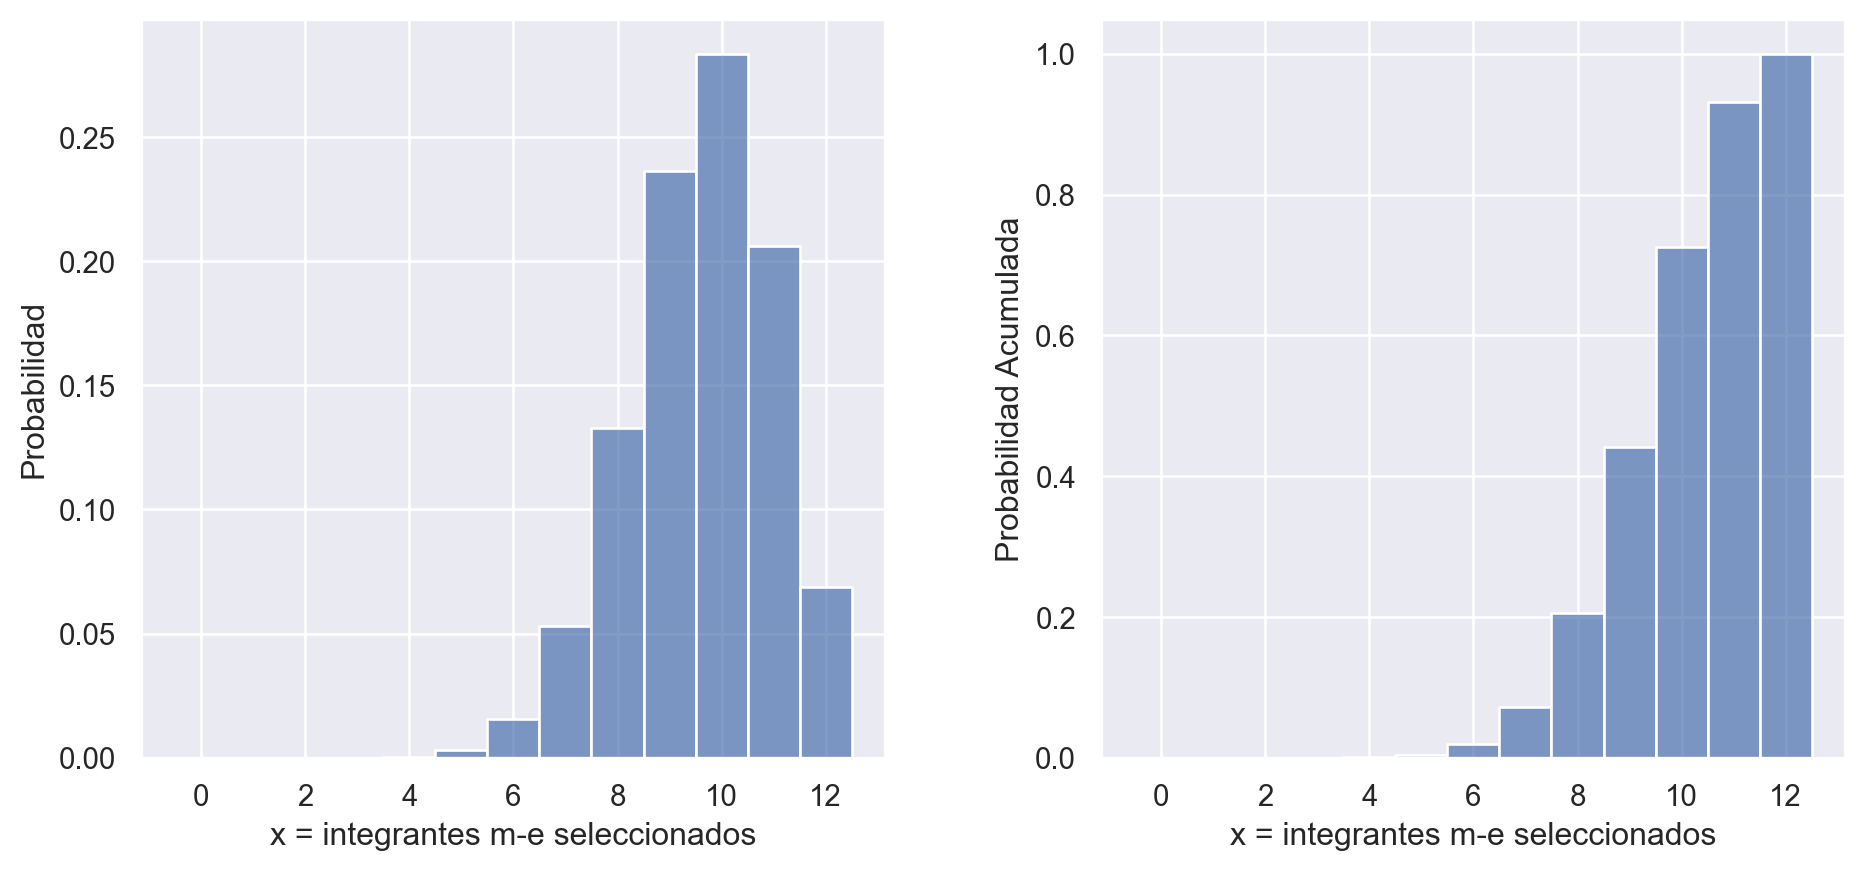

In [4]:
# Dataframe: Tabla de datos
df_miembros = pd.DataFrame(
    {
        'x': x,
        'p': d_prob,
        'x.p': [x[i] * d_prob[i] for i in range(n+1)],
        'xx.p': [x[i]**2 * d_prob[i] for i in range(n+1)],
        'p-acu': d_prob_ac,
        'p-acr': d_prob_ac_inv      
    }
)
print(df_miembros.round(3).set_index('x'))

# Estadisticos: Calculo de la media de la distribución de probabilidad
print(f"\nEstadísticos:")

# Calculos: sumatoria de probabilidades, media, varianza y desviación estandard
sumprob = df_miembros.p.sum()
media = df_miembros['x.p'].sum()
sum_xx_p = df_miembros['xx.p'].sum()
varianza = sum_xx_p - media ** 2
desvstan = math.sqrt(varianza)

# Impresión de estadísticos
print(f"Sumatoria de probabilidades: {sumprob}")
print(f"Media y Esperanza          : {media}")
print(f"Varianza                   : {varianza:.3f}")
print(f"Desviación Estandard       : {desvstan:.3f}")

# Revisión de estadísticos por Scipy
# La función de distribución binomial de SciPy binom.stats devuelve: Los momentos de primero a cuarto orden:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Revisión de estadísticos por scipy:")
print(f"mean: {mean:.2f}, var: {var:.2f}, skew: {skew:.2f}, kurt: {kurt:.2f}.")

# Gráficos
# Distribución de probabilidad binomial
f = mpl.figure.Figure(figsize=(10, 5))
sf1, sf2 = f.subfigures(1, 2)
# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="p")
    .add(so.Bars(),)
    .label(x="x = integrantes m-e seleccionados", y="Probabilidad")
    .on(sf1)
    .plot()
)

# Visualización con Seaborn Objects
# Crear la figura y los ejes
(
    so.Plot(df_miembros, x="x", y="p-acu")
    .add(so.Bars())
    .label(x="x = integrantes m-e seleccionados", y="Probabilidad Acumulada")
    .on(sf2)
)



##### Observaciones:
+ El numero de miembros del jurado mexico-estadounidenses esperable está entre 9 y 10. (Esperanza: 9,6)
+ La distribución está sesgada a la izquierda (sesgo negativo):
    + La probabilidad de miembros m-e aumenta con la cantidad de miembros.
    + La composición de la población (80/20) justifica una mayor participación de miembros m-e.
    + El 80% de 12 miembros m-e daría 9,6 miembros.

### Resultados más esperables y menos esperables
Regla práctica del intervalo: a) valor mínimo + común   : media - dos desvíos estandard.    b) valor máximo + común  : media  + dos desvios estandard.  

In [5]:
# Calculos de valores minimo y máximo comunes dentro de los cuales se encuentra el 95% 
# de los valores de la distribución de probabilidad.
val_min_comun = media - 2 * desvstan
val_max_comun = media + 2 * desvstan

# Impresión de resultados
print(f"Intervalo de confianza:")
print(f"Valor mínimo más común: {val_min_comun:.2f} y Valor máximo más común: {val_max_comun:.2f}")
print(f"Los valores más probables de x están entre {val_min_comun:.2f} y {val_max_comun:.2f}")
print(f"El valor más esperable es: {media:.2f}")

Intervalo de confianza:
Valor mínimo más común: 6.83 y Valor máximo más común: 12.37
Los valores más probables de x están entre 6.83 y 12.37
El valor más esperable es: 9.60


**Interpretación:** El intevalo de confianza refleja que:
+ Es esperable que los miembros del jurado elegidos al azar tengan una cantidad de miembros "m-e" que estén entre 7 y 12 miembros que es dónde se encuentra el 95% de los resultados más probables.
    + El 95% de los resultados más probables se encuentra sesgado a la derecha:
        + Es más probable que exista una mayoría de miembros "m-e".
        + Es poco probable que este tipo de jurados tenga menos de 7 miembros.
        + Si podría tener 12 miembros, pero dificilmente tendría 6 o menos miembros "m-e"
        + Ya solo la probabilidad de que existan 12 miembros "m-e" es mayor que el 5% (casi 7%)
    + El 5% de los resultados menos probables se encuentra a la izquierda:
        + Para menos de 7 (6 o menos) la probabilidad decrece significativamente.
        + Es difícil que por azar existan menos de 6 miembros "m-e" en el jurado.

#### Resultados infrecuentes
+ Uso de las probabilidades para determinar resultados infrecuentes
    + Número de éxitos inusualmente alto: x éxitos en n ensayos es un número inusualmente alto de éxitos si P(x o más)  0.05.*
    + Número de éxitos inusualmente bajo: x éxitos en n ensayos es un número inusualmente bajo de éxitos si P(x o menos)  0.05.*
+ *El valor de 0.05 se utiliza de forma regular (coincide con el intervalo de confianza 95%), pero no es absolutamente rígido. 
    + Se podrían usar otros valores, como 0.01, para distinguir entre sucesos que pueden ocurrir con facilidad por azar y sucesos que tienen muy pocas probabilidades de ocurrir por azar.

        p    x.p    xx.p  p-acu  p-acr
x                                     
0   0.000  0.000   0.000  0.000  1.000
1   0.000  0.000   0.000  0.000  1.000
2   0.000  0.000   0.000  0.000  1.000
3   0.000  0.000   0.001  0.000  1.000
4   0.001  0.002   0.008  0.001  1.000
5   0.003  0.017   0.083  0.004  0.999
6   0.016  0.093   0.558  0.019  0.996
7   0.053  0.372   2.604  0.073  0.981
8   0.133  1.063   8.504  0.205  0.927
9   0.236  2.126  19.134  0.442  0.795
10  0.283  2.835  28.347  0.725  0.558
11  0.206  2.268  24.945  0.931  0.275
12  0.069  0.825   9.896  1.000  0.069


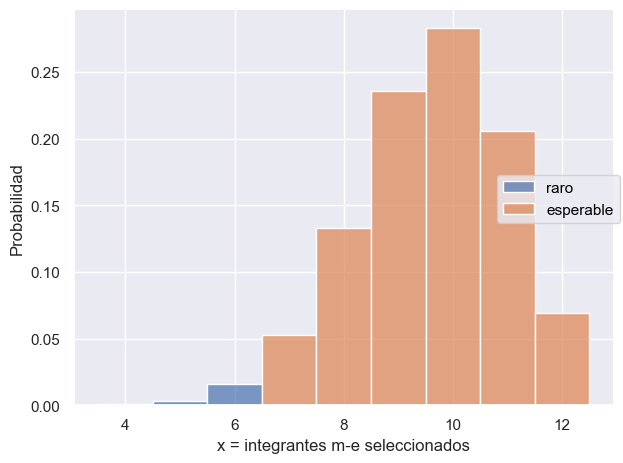

In [6]:
df_m = df_miembros.round(3).set_index('x')
print(df_m)
# Añadir una columna de color
df_m['Miembros'] = ['raro' if i <= 6 else 'esperable' for i in df_miembros['x']]

# Crear la figura y los ejes usando seaborn.objects
hist = (
    so.Plot(df_m, x='x', y='p', color='Miembros')
    .add(so.Bars())
    .label(x="x = integrantes m-e seleccionados", y="Probabilidad", color="")
)

# Mostrar el gráfico , color = df_miembros['x'][df_miembros['x'] < 8]
hist.show()

**Resultados infrecuentes:**
+ La regla del intervalo nos dice que los resultados infrecuentes son aquellos con una probabilidad acumulada menor al 5%.
+ Se utiliza la probabilidad acumulada porque aunque los resultados son muy poco probables, siguen teniendo una probabilidad.
    + Estamos hablando de una baja probabilidad de 1 o 2 o 3 o 4 o 5 o 6 miembros puedan conformar un jurado de 12.
    + La probabilidad acumulada (['p-acu'] ) aumenta pero es solo 2% para 6 o menos miembros.
        + Esta probabilidad se hace significativa (> 5% cuando x = 7)
    + La probabilidad acumulada invertida (['p-acu']) aumenta muy rápidamente de 12 a 1.
    + Se ve como al llegar a 6 miembros ya se cubre el 95% de los casos más probables.

### Analisis de discriminación
#### ¿7 miembros implica discriminación?
+ ¿Siete jueces méxico-estadounidenses, de un total de 12, es un número excepcionalmente bajo? 
+ ¿La selección de sólo 7 méxico-estadounidenses en un total de 12 miembros del jurado sugiere que existe discriminación en el proceso de selección?

In [7]:
# Revisamos las probabilidades acumuladas untilzando el criterio el criterio visto hasta ahora:
# La candidad de miembros m-e es excepcionalmente bajo si P(x o menos) <= 0,05
df_m[['p-acu','Miembros']]

,p-acu,Miembros
x,,
0,0.000,raro
1,0.000,raro
2,0.000,raro
3,0.000,raro
4,0.001,raro
5,0.004,raro
6,0.019,raro
7,0.073,esperable
8,0.205,esperable


**Observación**

Como se ve en la tabla y en la grafica la cantindad de miembros m-e esperables es mayor o igual a 7 por lo que:
+ Si nos remitimos a la tabla obtenemos el siguiente resultado:
    + P(7 o menos méxico-estadounidenses en un total de 12 miembros del jurado) =
    + P(7 o 6 o 5 o 4 o 3 o 2 o 1 o 0) = 
    + P(7) + P(6) + P(5) + P(4) + P(3) + P(2) + P(1) + P(0) = 
    + 0.053 + 0.016 + 0.003 + 0.001 + 0 + 0 + 0 + 0 =
    + P(7 o menos méxico-estadounidenses en un total de 12 miembros del jurado) = **0.073**
* Esto es la probabilidad acumulada de 1 a 7

**Interpretación**
+ **7** miembros es una cantidad esperable de miembros y no es un número excepcionalmente bajo.
+ Una selección y composición con 7 miembros como esta, **no implica necesariamente una selección con discriminación**.

### Discriminación en el tiempo
Dado que durante 11 años sólo el 39% de los individuos que fueron jueces eran mexicoestadounidenses. ¿se puede concluir que el proceso de selección del jurado discriminó a este grupo?

#### Observaciones e interpretación
1. Por lo visto al calcular la distribución de probabilidad, se puede deducir que 39% de 12 = 4,68 (5 miembros aproximadamente).
2. 39% de miembros del jurado es una proporción muy distinta a la de la composición de la población que es 80%. Hubiera sido esperable que, a lo largo del tiempo, la participación de este grupo fuera mayor.
3. Entre 4 y 5 miembros en jurados de 12, es por lo visto aquí, un resultado infrecuente porque sus probabilidades acumuladas con bajas (ver p-acu en tabla). Esto hace pensar que puede haber habido algún tipo de discriminación, ya que por azar esto es muy poco probable.

* Si bien estas observaciones e interpretaciones no son concluyentes, si permiten generar el beneficio de la duda en favor de la discriminación y tomar acciones para evitar este tipo de sospecha, por ejemplo, con una selección aleatoria de los miembros del jurado.

__________________________________________________________________________________________________________________________